# Predicting insurance costs given the set of attributes in this data set.

#### Data Dictionary
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

#### Import necessary tools.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle, islice

#### Load and peek at the data.

In [2]:
df = pd.read_csv('insurance.csv')
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
#general information
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


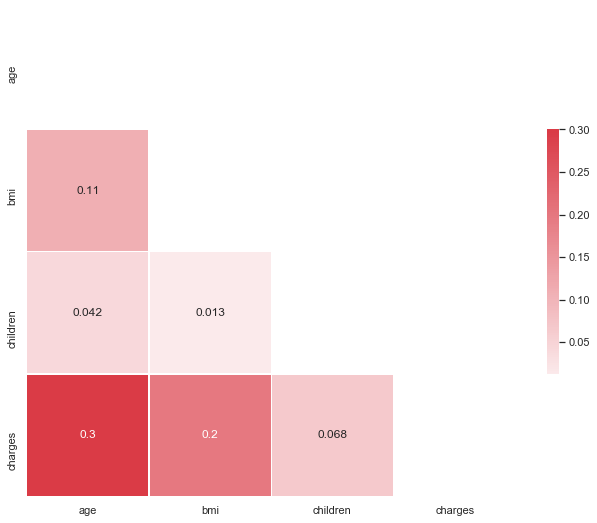

In [5]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

#### Age and BMI have by far the highest correlations with charges.

#### Let's look at the distribution of the data now.

Data distribution analysis


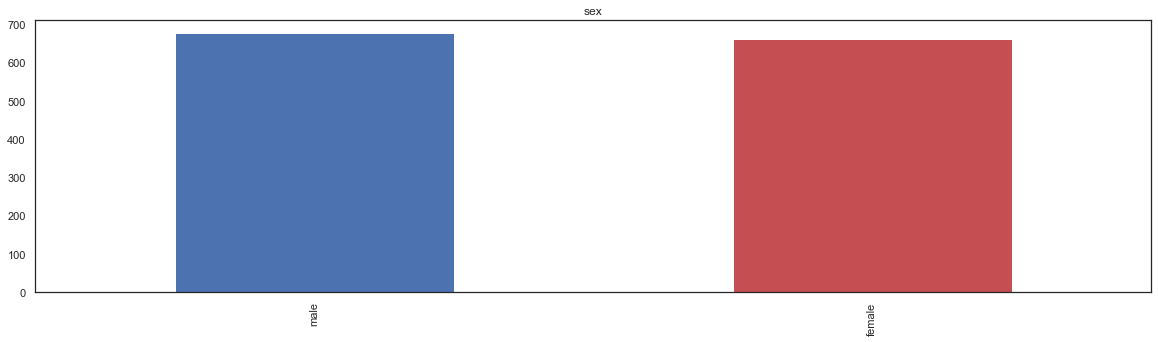

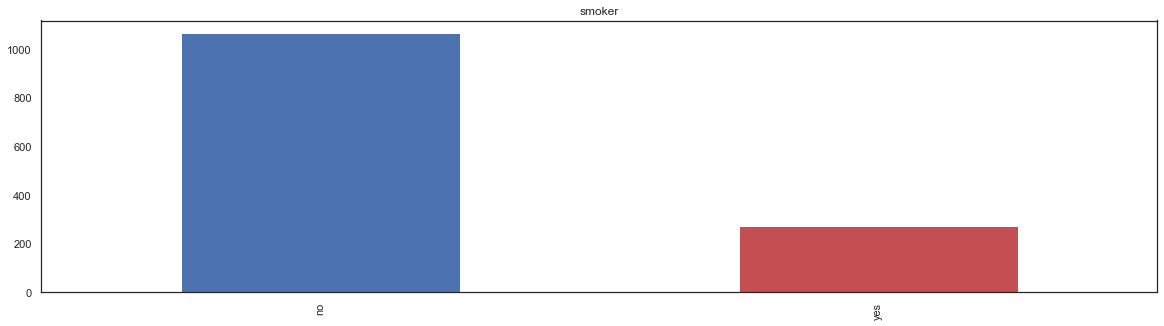

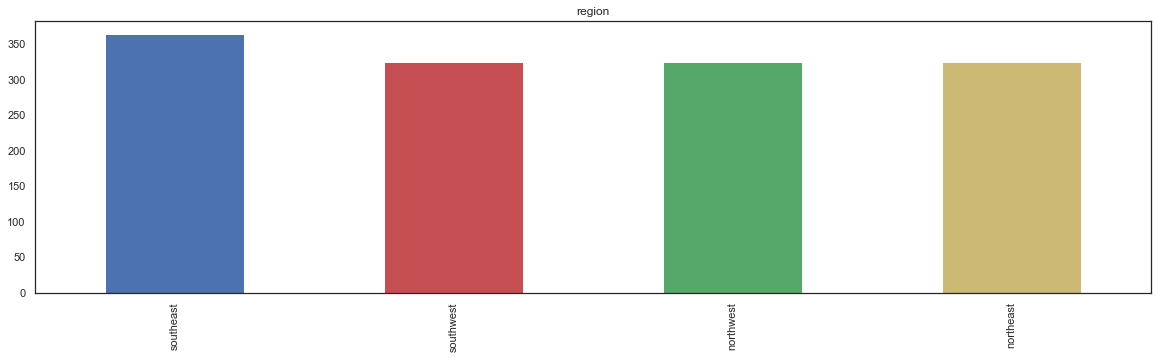

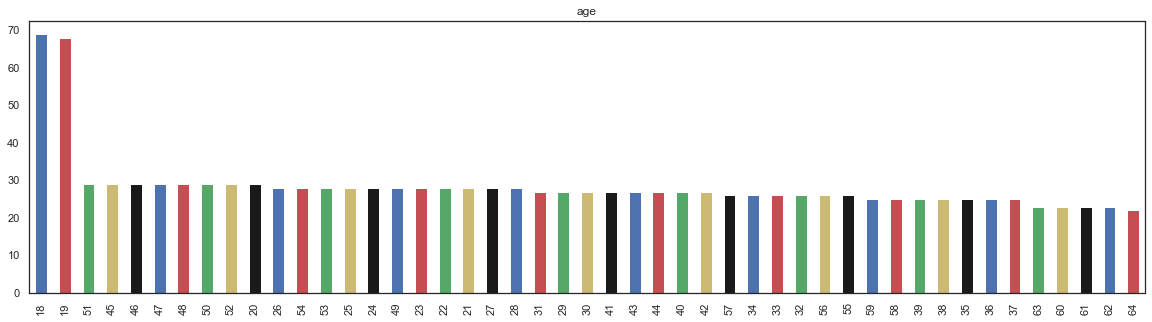

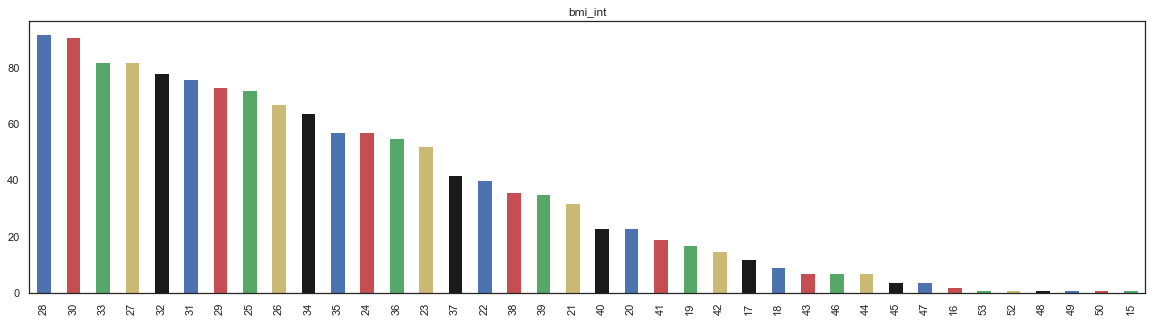

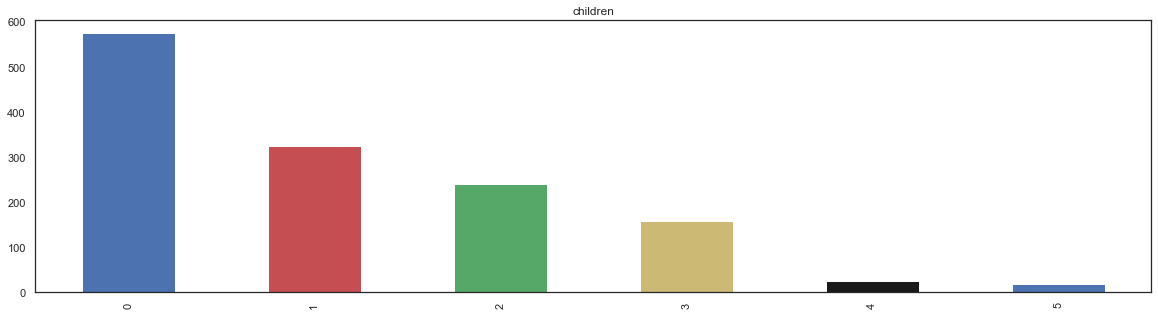

In [14]:
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))
variables = ['sex','smoker','region','age','bmi_int','children']

# data distribution analysis
print('Data distribution analysis')
for v in variables:
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df[v])))
    plt.figure(figsize=(20,5))
    df = df.sort_values(by=[v])
    df[v].value_counts()\
        .plot(kind = 'bar',
              color=my_colors)
    plt.title(v)
    plt.show()

#### Now let's look at the average cost per feature value.

Mean cost analysis:


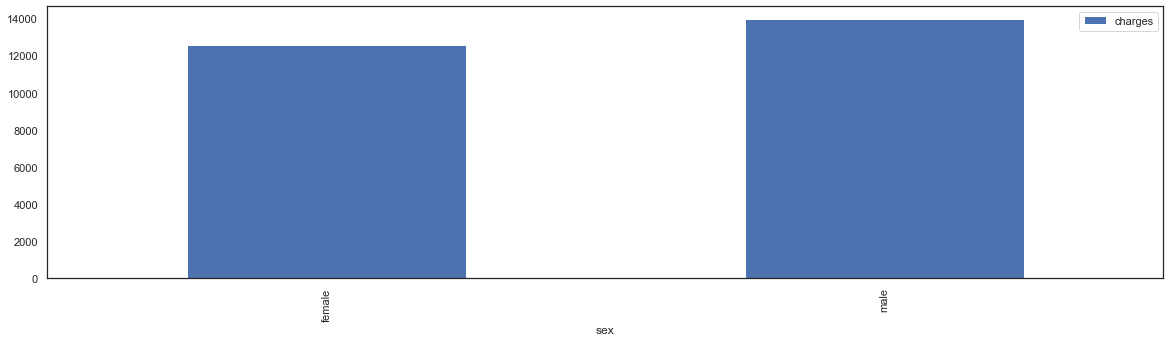

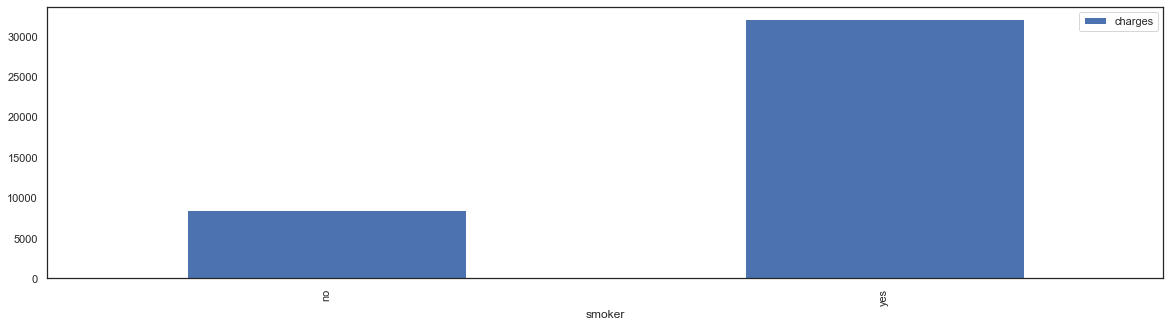

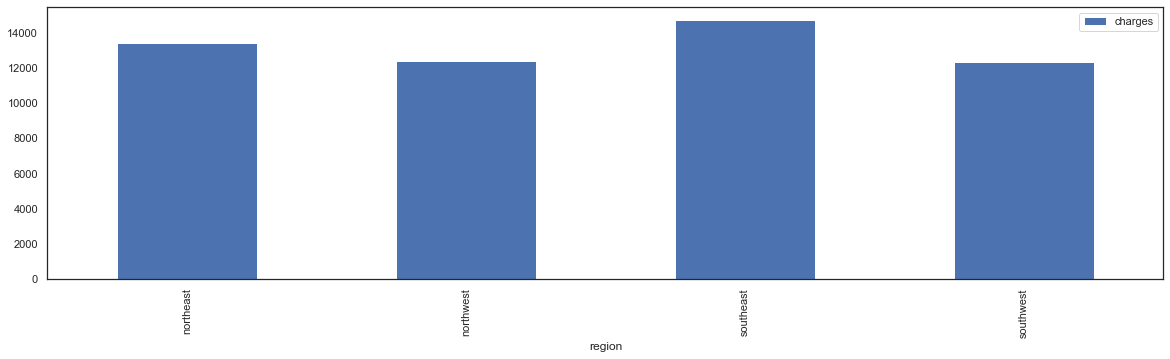

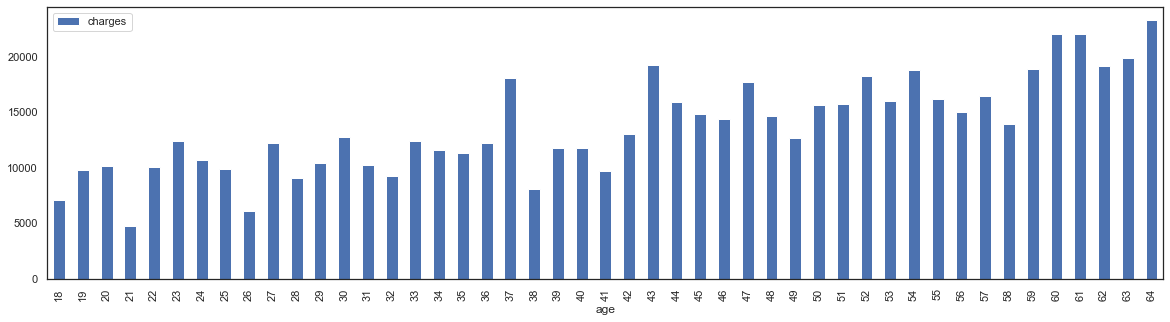

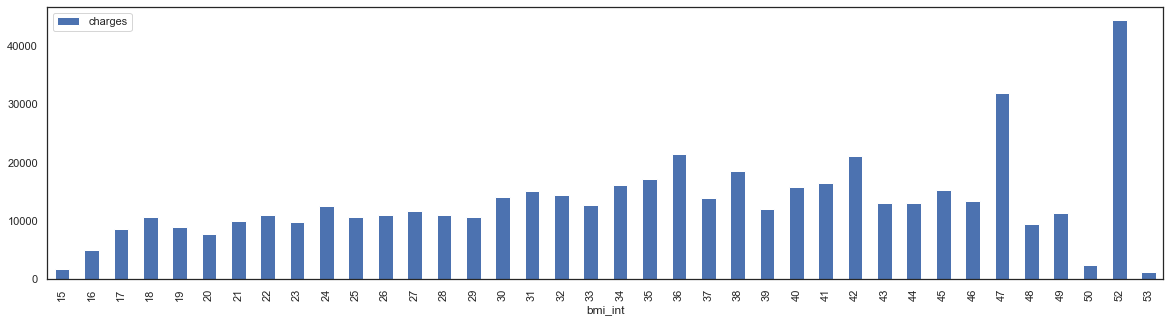

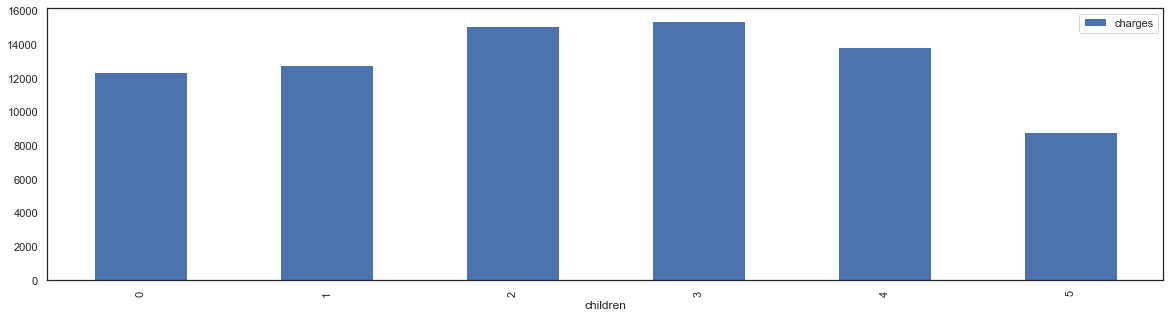

In [34]:
print('Mean cost analysis:')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar', figsize=(20,5))
    plt.show()

- Men average a little bit more than women.
- Smokers average a lot more than non-smokers.
- Regions don't really vary.
- Cost trends up with age.
- Need to look more carefully at bmi. Cost sort of trends up as bmi increases, but then the last four markers are really odd.
- Not much difference between numbers of children except five is significantly less.

#### Let's look at a pairs plot. It will allow us to see both the distribution of single variables as well as the relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

Variables pairplot:


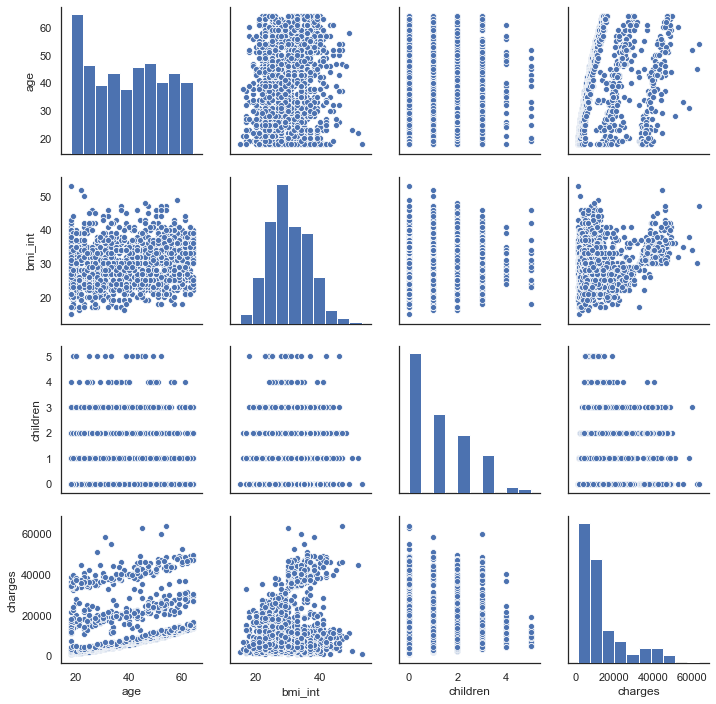

In [62]:
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

- Age shows three distinct tiers of linear relationships with charges.
- Charges are pretty similar for 0-3 children, but drop off for 4 and especially 5.
- Max bmi drops as the number of children increases until 5 children.